In [12]:
# check correlation between features (which can then be removed if high corr)
import numpy as np

x = np.random.randn(100, 5)
noise = np.random.randn(100)
# making the 5th col be correlated to the first and 3rd
x[:,4] = 2 * x[:,0] + 3 * x[:,2] + .5 * noise

In [15]:
corr = np.corrcoef(x, rowvar=0)
w, v = np.linalg.eig(corr)
print('eigenvalues of features in the dataset x') # represent the amount of new info
print(w) # low value(close to 0) suggests it is highly corr with another feature(s)

eigenvalues of features in the dataset x
[0.0076554  1.92213011 0.87863441 1.09925374 1.09232634]


In [25]:
print('eigenvalues of eigenvector 0')
print(v[:,0]) # the 2nd and 4th feature, due to the small values(close to 0), is not related to feature 1
# in contrast, the 3rd and 5th feature are multicollinear with feature 1

eigenvalues of eigenvector 0
[-0.39379957  0.00348652 -0.6097173  -0.00433961  0.68784862]


In [32]:
# LASSO (L1 regularization)
from sklearn.linear_model import Lasso # Linear Model trained with L1 prior as regularizer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

boston = load_boston()
scaler = StandardScaler()
X = scaler.fit_transform(boston["data"])
y = boston["target"]
names = boston["feature_names"]

In [39]:
lasso = Lasso(alpha = 0.3)
lasso.fit(X, y)

def pretty_print_linear(coefs, names = None, sort = False):
    if type(names) == 'NoneType':
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

print("Lasso model: ", pretty_print_linear(lasso.coef_, names, sort = True))
# note the features with 0 corr
# -0.0 * INDUS + -0.0 * AGE + 0.0 * RAD + -0.0 * TAX
# this allows for feature selection

Lasso model:  -3.705 * LSTAT + 2.993 * RM + -1.756 * PTRATIO + -1.081 * DIS + -0.699 * NOX + 0.628 * B + 0.54 * CHAS + -0.242 * CRIM + 0.082 * ZN + -0.0 * INDUS + -0.0 * AGE + 0.0 * RAD + -0.0 * TAX


In [42]:
# Recursive Feature Elimination (RFE)
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

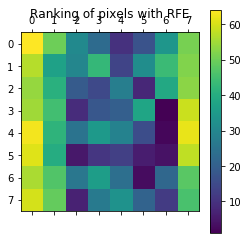

In [45]:
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1) # RFE acts as a wrapper to the estimator, i.e. SVC
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)


plt.matshow(ranking)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()
# the features(pixels) near the center are rated as more important(kept in the features list longer) than the ones as the sides

In [ ]:
# Train delay classifier - did not finish because of lack of data from sources

In [50]:
# Bing Traffic API - for HK data
import urllib.request, urllib.error, urllib.parse
import json

url = "http://dev.virtualearth.net/REST/v1/Traffic/Incidents/22.179824,114.105039,22.293266,114.256152?key=AqwxQqdD2_rItle62lhxNE31VEtsjKo0ZD8OkRXi3UUuOX_OYIHOuqn3cp0Vbgd_"
response = urllib.request.urlopen(url).read()
data = json.loads(response.decode('utf8'))
resources = data['resourceSets'][0]['resources']
# unfortunately, it seems Bing does not have HK-related data

In [ ]:
# Yahoo Weather API is currently down